# Assignment 1

**Due date and time**: The assignment is due on Monday February 26th, 2023 at 23:55. Hand in your files via DTU Learn. 

## A1 Part 1: Visualizing patterns in the data

In this sub-assignment, we recreate some of the plots from Week 2. We look only at the focus-crimes.

In [43]:
focuscrimes = set(['WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 
                   'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 
                   'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY', 
                   'DISORDERLY CONDUCT'])

For each set of plots below, describe the plots (as you would in the figure text in a report or paper), and pick a few aspects that stand out to you and comment on those (we provided a couple of ideas during class but it's OK to add more).

### First create the week-day plots, the months, the 24-hour cycle, and the 168 hours of the week as barcharts (Week 2, Part 2).

In [44]:
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import colormaps
import matplotlib.pyplot as plt
import matplotlib.cm as cm

df = pd.read_csv("../files/Police_Department_Incident_Reports__Historical_2003_to_May_2018_20240130.csv")
#df.head()


In [45]:
# make a new df with only the focused crimes
focus_df = df[df["Category"].isin(focuscrimes)].copy()

# Add Year and Month columns
focus_df['Year'] = pd.to_datetime(focus_df['Date']).dt.year
focus_df['Month'] = pd.to_datetime(focus_df['Date']).dt.month

# Group by year and count unique months for each year
# And if there are not 12 months in total, exclude the year (2018 in this case)
unique_months_per_year = focus_df.groupby('Year')['Month'].nunique()
years_to_exclude = unique_months_per_year[unique_months_per_year < 12].index.tolist()

# New df with only full years
complete_years_df = focus_df[~focus_df['Year'].isin(years_to_exclude)].copy()

### Weekday plots

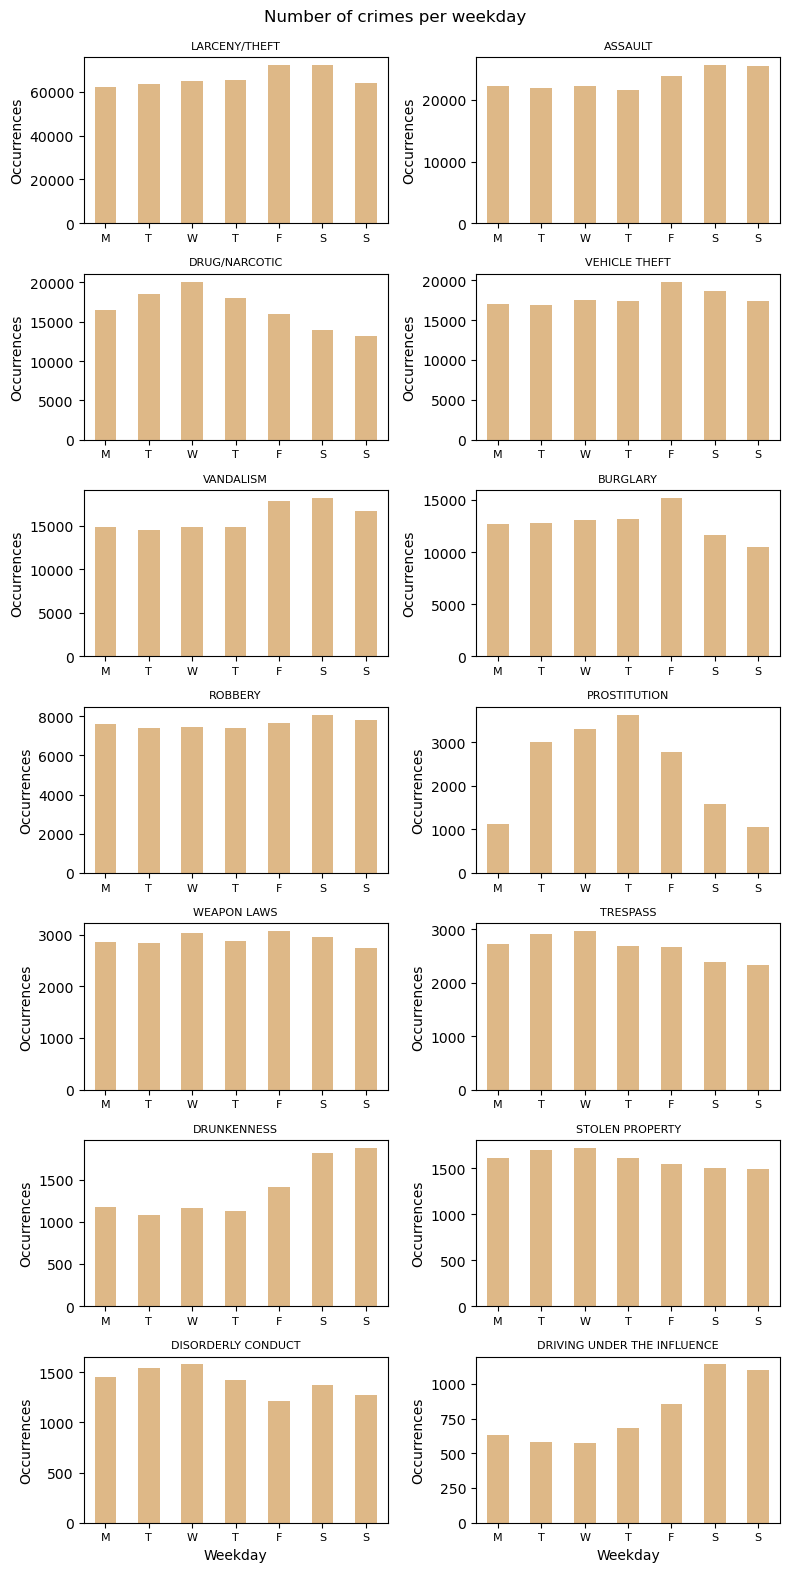

In [46]:
crime_data_weekday = {}
weekdays_ordered = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

for crime in focuscrimes:
    crime_df = complete_years_df[complete_years_df["Category"] == crime]
    weekday_names = pd.to_datetime(crime_df["Date"]).dt.day_name()

    crime_per_weekday = weekday_names.value_counts().sort_index()
    crime_per_weekday = crime_per_weekday.reindex(weekdays_ordered)
    crime_data_weekday[crime] = crime_per_weekday

# Calculate max y-value for each dataset
max_y_values = {crime: data.max() for crime, data in crime_data_weekday.items()}

# Sort crime categories by max y-value
sorted_crime_data = sorted(crime_data_weekday.items(), key=lambda x: max_y_values[x[0]], reverse=True)

fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(8, 16))
fig.suptitle("Number of crimes per weekday")

axes = axes.flatten()

for ax, (crime, data) in zip(axes, sorted_crime_data):
    data.plot(kind='bar', ax=ax, color="burlywood")
    ax.set_title(crime, size=8)
    ax.set_ylabel('Occurrences', size=10)
    ax.set_xlabel('Weekday', size=10, position='bottom')
    ax.set_xticklabels([label.get_text()[0] for label in ax.get_xticklabels()], size=8, rotation=0)


for i, ax in enumerate(axes):
# For all but the last row
    if i < 12:  # 12 is the index of the first plot in the last row (7 * 2 - 2)
#        ax.set_xticklabels([])  # Hide x-axis labels
        ax.set_xlabel('')
    else:
        for label in ax.get_xticklabels():
            label.set_fontsize(8)

plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()


FIGURE 1: Showing how the chosen crimes in San Francisco are distrubited on weekdays. The graphs are ordered by descending highest amount of incidents. Notice that the y-axis differs.

### Monthly plots

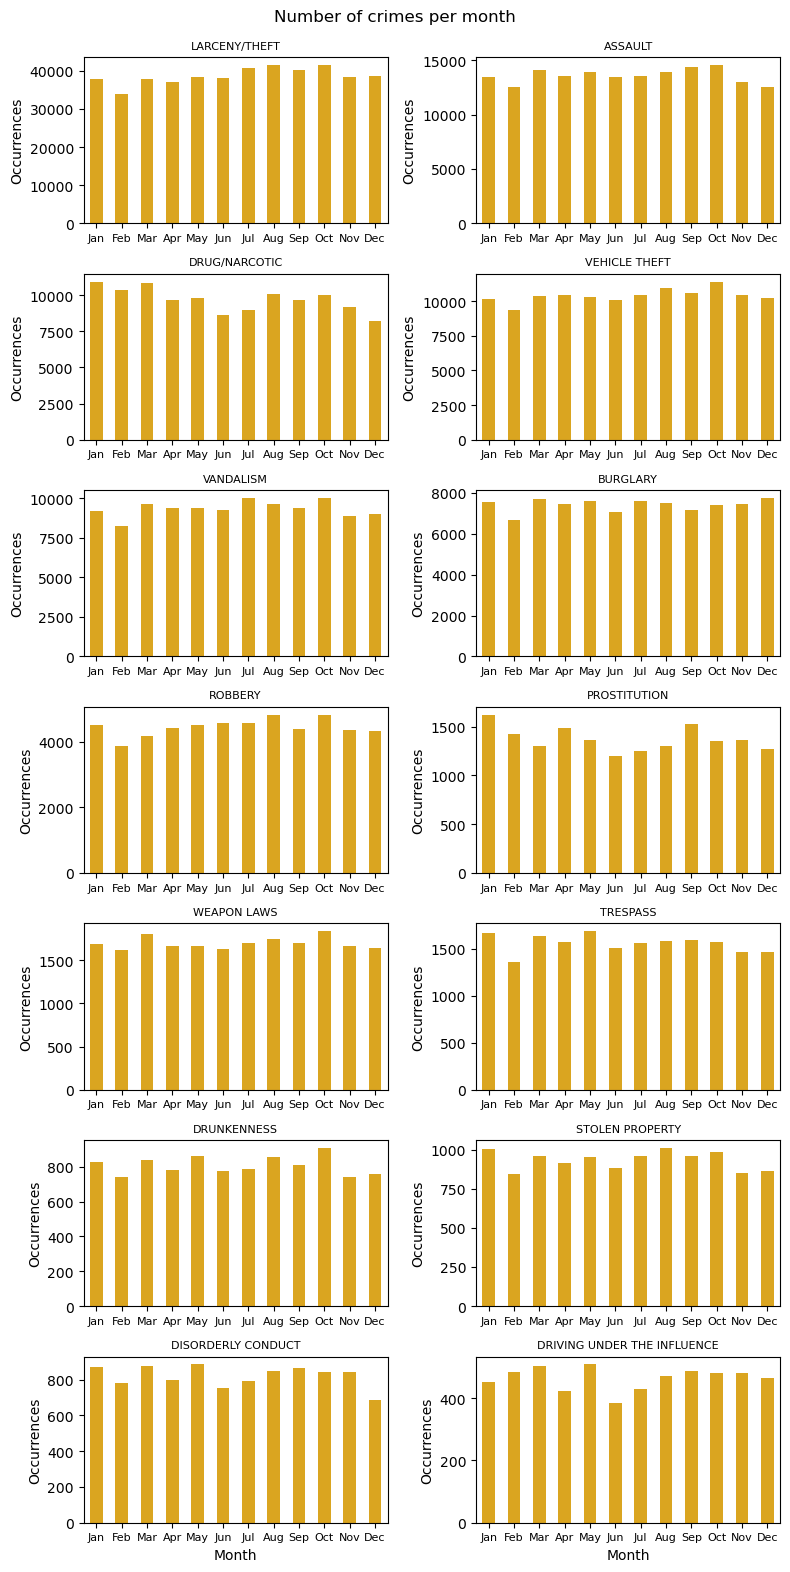

In [47]:
import calendar

# Ensure the 'Date' column in the original DataFrame is in datetime format
complete_years_df['Date'] = pd.to_datetime(complete_years_df['Date'])

crime_data_month = {}

for crime in focuscrimes:
    crime_df = complete_years_df[complete_years_df["Category"] == crime]

    # Convert the 'Date' column to month names within the loop
    month_names = crime_df['Date'].dt.month.apply(lambda x: calendar.month_name[x])

    # Count occurrences per month and sort by month order
    crime_per_month = month_names.value_counts().reindex(calendar.month_name[1:], fill_value=0)
    crime_data_month[crime] = crime_per_month

# Calculate max y-value for each dataset
max_y_values = {crime: data.max() for crime, data in crime_data_weekday.items()}

# Sort crime categories by max y-value
sorted_crime_data = sorted(crime_data_month.items(), key=lambda x: max_y_values[x[0]], reverse=True)

fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(8, 16))
fig.suptitle("Number of crimes per month")

axes = axes.flatten()

for ax, (crime, data) in zip(axes, sorted_crime_data):
    data.plot(kind='bar', ax=ax, color="goldenrod")
    ax.set_title(crime, size=8)
    ax.set_ylabel('Occurrences', size=10)
    ax.set_xlabel('Month', size=10, position='bottom')
    ax.set_xticklabels([label.get_text()[0:3] for label in ax.get_xticklabels()], size=8, rotation=0)

for i, ax in enumerate(axes):
# For all but the last row
    if i < 12:  # 12 is the index of the first plot in the last row (7 * 2 - 2)
#        ax.set_xticklabels([])  # Hide x-axis labels
        ax.set_xlabel('')
    else:
        for label in ax.get_xticklabels():
            label.set_fontsize(8)

plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()


FIGURE 2: Showing how the chosen crimes in San Francisco are distrubited on months. The graphs are ordered by descending highest amount of incidents. Notice that the y-axis differs.

### 24-hours plot

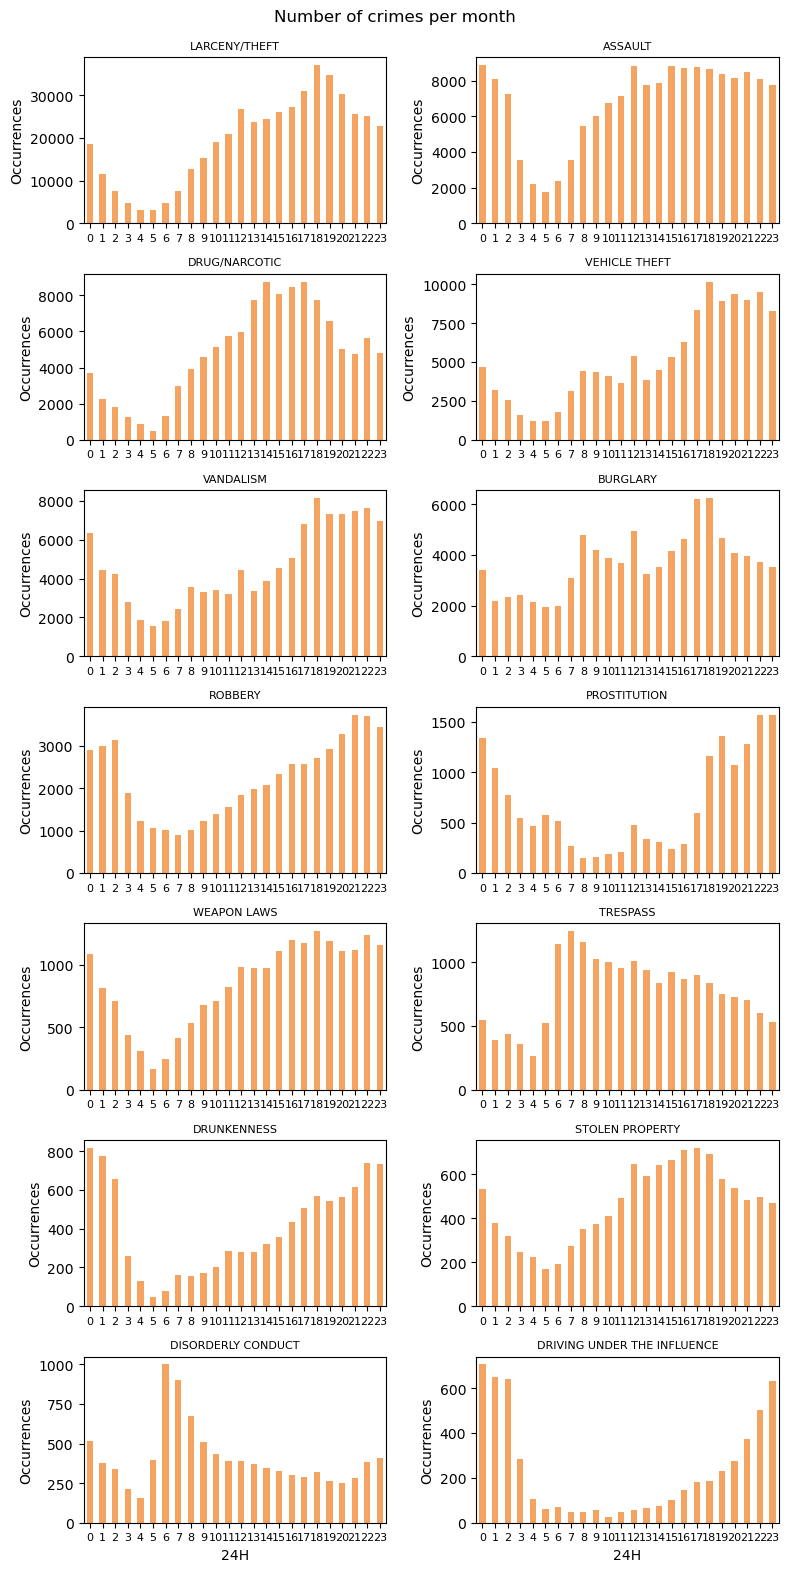

In [61]:
pd.to_datetime(focus_df['Time'], format='%H:%M').dt.hour

crime_data_hours = {}

for crime in focuscrimes:
    crime_df = complete_years_df[complete_years_df["Category"] == crime]
    crime_hours = pd.to_datetime(crime_df["Time"], format='%H:%M').dt.hour

    crime_per_hours = crime_hours.value_counts().sort_index()
    crime_data_hours[crime] = crime_per_hours

# Calculate max y-value for each dataset
max_y_values = {crime: data.max() for crime, data in crime_data_weekday.items()}

# Sort crime categories by max y-value
sorted_crime_data = sorted(crime_data_hours.items(), key=lambda x: max_y_values[x[0]], reverse=True)

fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(8, 16))
fig.suptitle("Number of crimes per month")

axes = axes.flatten()

for ax, (crime, data) in zip(axes, sorted_crime_data):
    data.plot(kind='bar', ax=ax, color="sandybrown")
    ax.set_title(crime, size=8)
    ax.set_ylabel('Occurrences', size=10)
    ax.set_xlabel('24H', size=10, position='bottom')
    ax.set_xticklabels([label.get_text()[0:3] for label in ax.get_xticklabels()], size=8, rotation=0)

for i, ax in enumerate(axes):
# For all but the last row
    if i < 12:  # 12 is the index of the first plot in the last row (7 * 2 - 2)
#        ax.set_xticklabels([])  # Hide x-axis labels
        ax.set_xlabel('')
    else:
        for label in ax.get_xticklabels():
            label.set_fontsize(8)

plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()


FIGURE 3: Showing how the chosen crimes in San Francisco are distrubited on the 24 hours of the day. The graphs are ordered by descending highest amount of incidents. Notice that the y-axis differs.

### 168 weekly hours plots


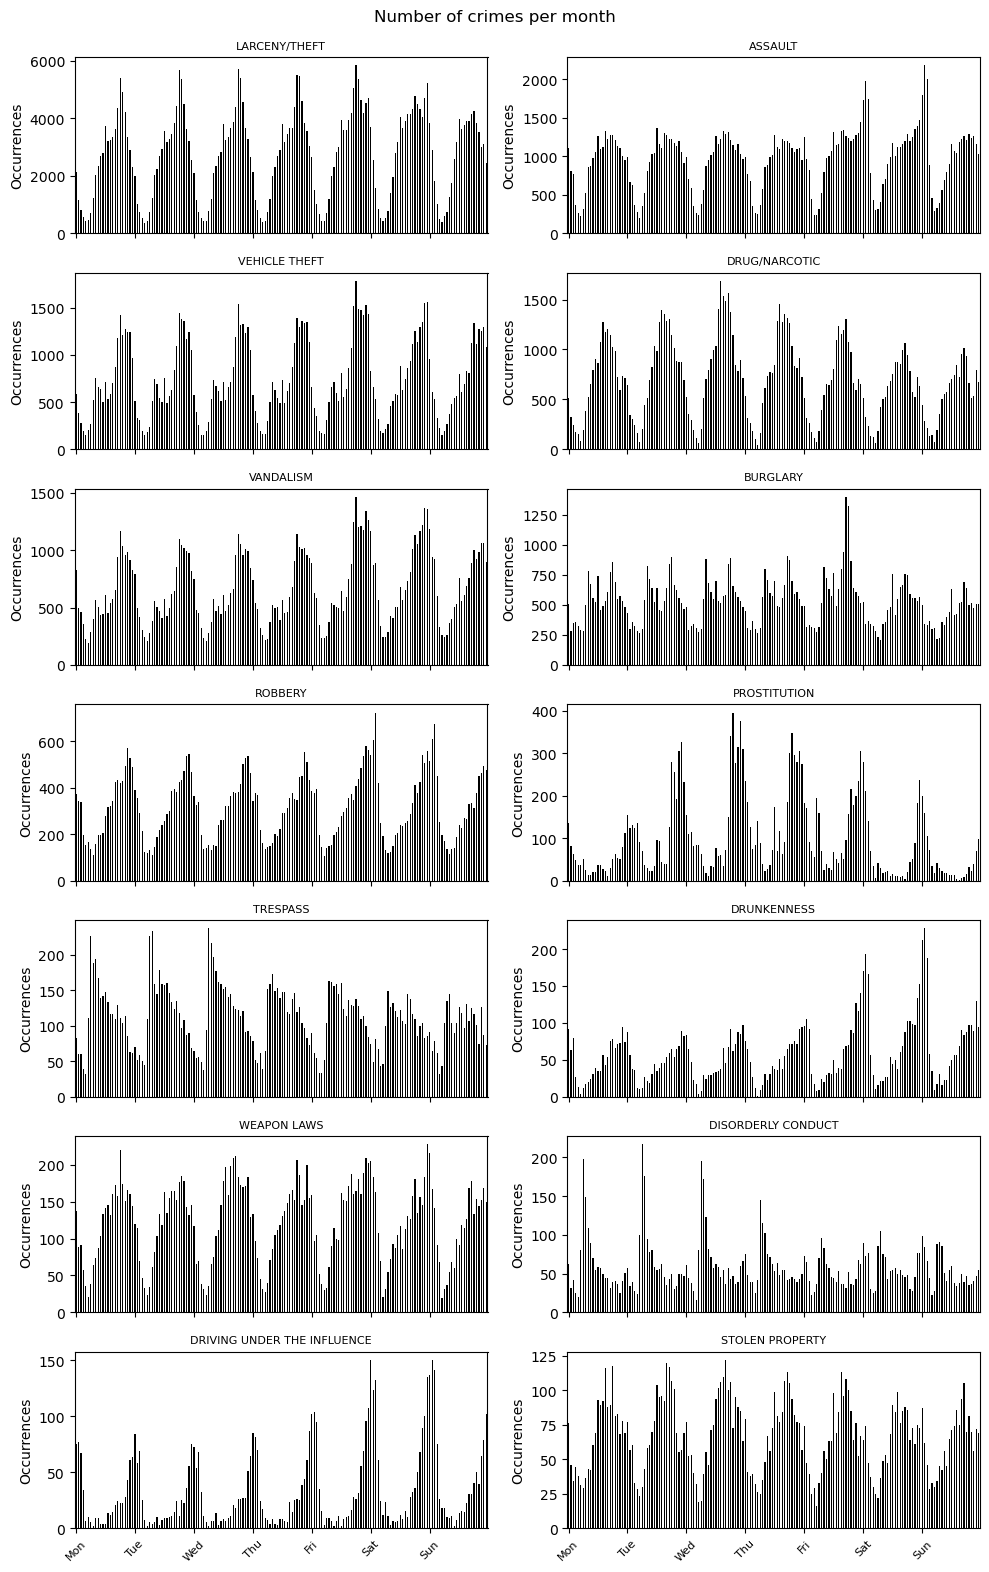

In [129]:
crime_data_dayhours = {}

for crime in focuscrimes:
    crime_df = complete_years_df[complete_years_df["Category"] == crime]
    crime_hours = pd.to_datetime(crime_df["Time"], format='%H:%M').dt.hour
    crime_weekdays = pd.to_datetime(crime_df["Date"]).dt.weekday
    
    crime_dayhours = crime_weekdays * 24 + crime_hours
    
    crime_per_dayhour = crime_dayhours.value_counts().sort_index()
    crime_data_dayhours[crime] = crime_per_dayhour
    
    
# Calculate max y-value for each dataset
max_y_values = {crime: data.max() for crime, data in crime_data_dayhours.items()}

# Sort crime categories by max y-value
sorted_crime_data = sorted(crime_data_dayhours.items(), key=lambda x: max_y_values[x[0]], reverse=True)

fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(10, 16))
fig.suptitle("Number of crimes per month")

axes = axes.flatten()
day_labels = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

for ax, (crime, data) in zip(axes, sorted_crime_data):
    data.plot(kind='bar', ax=ax, color="black")
    ax.set_title(crime, size=8)
    ax.set_ylabel('Occurrences', size=10)
    ax.set_xlabel('Hours during a week', size=10, position='bottom')
    ax.set_xlabel('')
    ax.set_xticks(range(0, 168, 24))
    ax.set_xticklabels(day_labels, size=12, rotation=45)  # Rotate for readability

for i, ax in enumerate(axes):
# For all but the last row
    if i < 12:  # 12 is the index of the first plot in the last row (7 * 2 - 2)
        ax.set_xticklabels([])  # Hide x-axis labels
        ax.set_xlabel('')
    else:
        for label in ax.get_xticklabels():
            label.set_fontsize(8)

plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()


FIGURE 4: Showing how the chosen crimes in San Francisco are distrubited on each 24 hour of the week. Once again, the graphs are ordered by descending highest amount of incidents. Notice that the y-axis differs.

### Next choose a crime type that you like and create a calendar plot (Week 2, Part 4). Don't forget to comment on patterns you observe.

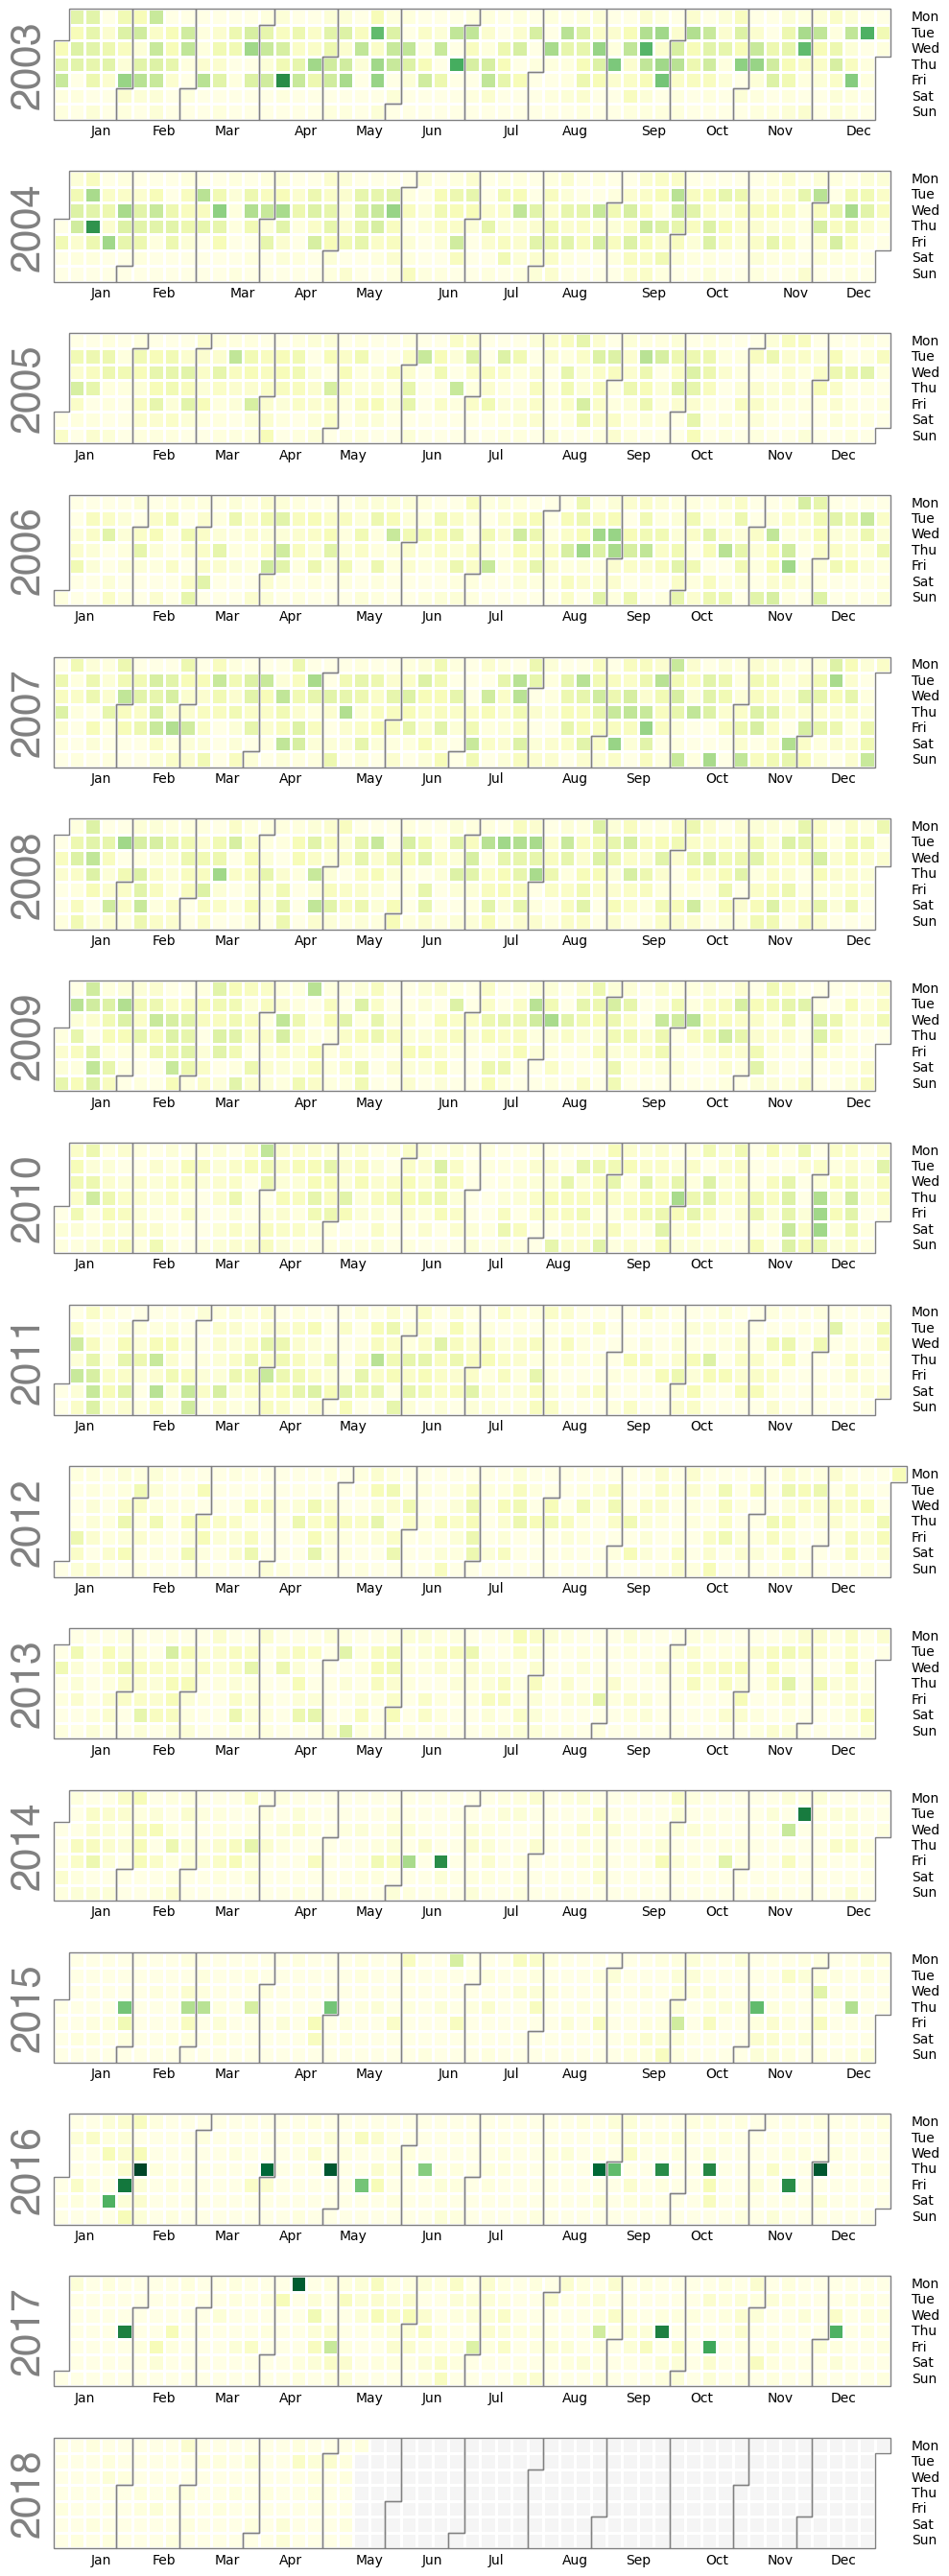

In [55]:
import calplot

focus_df['Date'] = pd.to_datetime(focus_df['Date'])

# Aggregate data by date
prostitution_by_date = focus_df[focus_df["Category"] == "PROSTITUTION"].groupby('Date').size()

# Create the calendar plot
calplot.calplot(prostitution_by_date, cmap='YlGn', colorbar=False)

plt.show()

FIGURE 5: A calendar plot for prostitution incidents in San Francisco in the years 2003-2018 (May). The plots seem to indicate a higher occurance during the middle of the week, ans also clearly a higher frequency in 2003, then dropping, with the seamingly least amounts of prositution in 2010-2013.

Comments:
- Most prostitutions occur during the middle of the week in the calendar.
- Seems like it is more frequent overall in 2003, then dropping.
- Thee is least occurences overall in 2010-2013.
- A few random(?) spikes in 2014 and then some more frequent spikes on Thursdays in 2016.



### Finally, choose a different crime type and create a polar plot of its 24hour cycle (Week 2, Part 4). Again, don't forget to comment as you would in a figure text.

In [130]:
focus_df["Category"].unique()

array(['ROBBERY', 'VEHICLE THEFT', 'ASSAULT', 'TRESPASS', 'BURGLARY',
       'LARCENY/THEFT', 'DRUG/NARCOTIC', 'VANDALISM', 'WEAPON LAWS',
       'DISORDERLY CONDUCT', 'PROSTITUTION', 'DRUNKENNESS',
       'DRIVING UNDER THE INFLUENCE', 'STOLEN PROPERTY'], dtype=object)

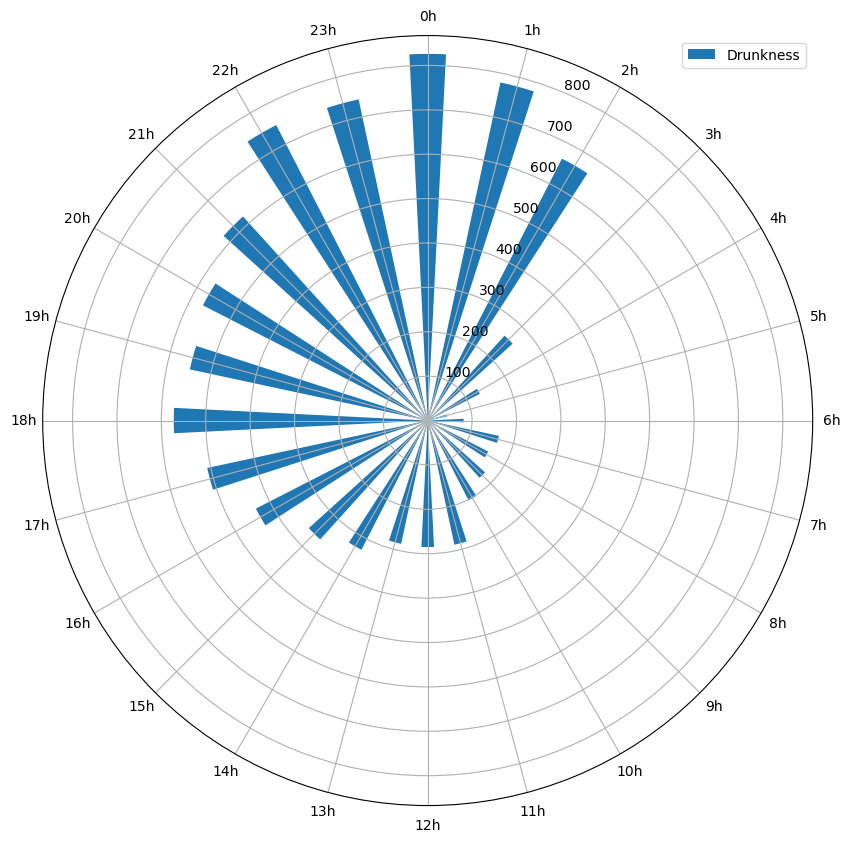

In [131]:
drunkness_df = focus_df[focus_df["Category"] == "DRUNKENNESS"]
drunkness_hours = pd.to_datetime(drunkness_df["Time"], format='%H:%M').dt.hour
drunkness_per_hours = drunkness_hours.value_counts().sort_index()

# Ensure counts for all 24 hours
all_hours = pd.Series(index=np.arange(24), data=0)  # Series with 0 for each hour
drunkness_per_hours = all_hours.add(drunkness_per_hours, fill_value=0)

# Set up the polar plot
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(10, 10))

# Set the theta for each bar
theta = np.linspace(0.0, 2 * np.pi, 24, endpoint=False)

# Plot
heights = drunkness_per_hours
bars = ax.bar(theta, heights, width=0.1, bottom=0.0, label="Drunkness")

ax.set_theta_zero_location('N')  # Set 0 degrees at the top
ax.set_theta_direction(-1)      # Clockwise
ax.set_xticks(theta)
ax.set_xticklabels([f'{h}h' for h in range(24)])  # Set labels for each hour
ax.legend()

plt.show()


FIGURE 6: A 24 hour polar plot of the drunkness incidents in San Francisco. Drunkness seem to rise during the day, especially after 4-5pm, probably due to people finishing their dayjob. Another significant rise is seen at about 10-11pm with a peak at midnight. At 2pm where nightlife in the city is closing down, the incidents also drop significantly.

### Write a short reflection (max 400 words, shorter is OK) on how you've used LLMs to solve these assignments (or if you didn't use LLMs, explain why).

I have used LLM (mainly Code Tutor GPT) every mostly instead of googling the syntax, as it is much faster and gives a direct answer to my specific problem. I also used it to break down problems into subproblems and show me the logical steps in solving problems and also for explaining how to do something, when I didn't understand it. For the problems where I could use LLM all in, I posted the quation and let it write the whole code for me, and then adapting it afterwords or get help from the LLM for adapting it. 

As a computer scientist, who never really did have the patients for writing code, but prefer the system development, HCI and interdisciplinary creative domain thinking, this is perfect for me. The trade-off might be, that I will never be as quick to write code without help, but that's fine with me, as long as I understand what is possible, why and how and then use the tools accordingly.

## A1 Part 2: Dataviz questions

Have a look at the Data Viz intro lecture (Week 2), then answer the following questions in your own words. 

### What is the difference between data and metadata? How does that relate to the GPS tracks-example?

 Metadata is data about the data or information that we are interested it. It can give us more information about the context of the data. In the GPS example, metadata can be the latitude and longitude coordinates, the altitude for tracking movement in 3D and the time stamp. It could also be other related data, like images or videos for showing the movement visually.*


### Sune says that the human eye is a great tool for data analysis. Do you agree? Explain why/why not.

#### Mention something that the human eye is very good at.

The human eye can be effective when the visuals contain length or amount comparisons (like 1 vs 1000 dots or length) and are primarily kept in one scale.  It might also be suitable for a quick comparison of shapes and sizes but less so when we need an accurate area measurement for similar sizes.
 

#### Can you think of something that is difficult for the human eye to process visually. Explain why your example is difficult.
When scales or sizes in a visualization vary greatly, it is less effective.

For example it is almost impossible to visualise a model of the solar system that is true to size of objects and distances, because for 1) the sizes of the objects vary so much, that the rocky planets would not be visible compared to the Sun, and 2)  even if we leave out the Sun and only look at the planets, the distances are so vast that it would not be possible to see the inner distances between the rocky planets and the distances to the gas planets and beyond in a meaningful way. This is due to the immense distances after the asteroid belt and beyond.

### Simpson's paradox is hard to explain. Come up with your own example - or find one online.

Simpson's paradox occurs when an overall trend for a collection of data is different than the individual trends for subsets leading to wrong conclusions. It happens due to variations in group sizes and and comparisons between different subsets. For instance, in kidney stone treatments A and B, A was more effective for both small and large stones individually, but overall for the whole dataset, B showed a higher success rate.  This was because B was more frequently used for small stones and A for large ones. Since small stones generally have a higher treatment success rate and B was dominant in this group, the overall data skewed in favor of B, despite A's individual effectiveness in both stone sizes. Source: https://en.wikipedia.org/wiki/Simpson%27s_paradox

### In your own words, explain the differnece between exploratory and explanatory data analysis.

- Exploratory: We look at data exploratory to find patterns and trends and what to look for further.
- Explanatory: We have some data and perhaps see some trends or patterns that we want to explain.

## A1 Part 3: Visualizing geodata using Plotly

In this sub-assignment I want you to create a choropleth map of San Francisco, showing where it's safest to leave your car on Sundays, following the instructions from Week 3.

In [134]:
geojson_url = 'https://raw.githubusercontent.com/suneman/socialdata2022/main/files/sfpd.geojson'

from urllib.request import urlopen
import json
with urlopen(geojson_url) as response:
    counties = json.load(response)

# Set to keep track of geometry types
geometry_types = set()


# I want to find the average longitude and latitude from the data automatically

# Initialize variables to sum longitudes and latitudes
total_longitude = 0
total_latitude = 0
count = 0

# Function to process a list of coordinates
def process_coords(coords_list):
    global total_longitude, total_latitude, count
    for coord_pair in coords_list:
        total_longitude += coord_pair[0]
        total_latitude += coord_pair[1]
        count += 1

# Iterate over each feature in the GeoJSON object
for feature in counties['features']:
    geom_type = feature['geometry']['type']
    coordinates = feature['geometry']['coordinates']
    
    if geom_type == 'Polygon':
        for ring in coordinates:  # Each Polygon can have multiple rings (first is the outer ring)
            process_coords(ring)

    elif geom_type == 'MultiPolygon':
        for polygon in coordinates:  # Each MultiPolygon contains multiple Polygons
            for ring in polygon:  # Each Polygon can have multiple rings
                process_coords(ring)

# Calculate the average if count is not zero
if count > 0:
    avg_longitude = total_longitude / count
    avg_latitude = total_latitude / count
    print("Average Longitude:", avg_longitude)
    print("Average Latitude:", avg_latitude)
else:
    print("No coordinates found")


Average Longitude: -122.42493579160154
Average Latitude: 37.77664605675238


In [136]:
import geopandas as gpd
from shapely.ops import transform
from functools import partial
import pyproj

# Also, I want to calculate the area sizes, so I can compare number of incents per area

gdf = gpd.read_file(geojson_url)
gdf = gdf.rename(columns={'id': 'PdDistrict'})


# Project the geometries to a planar system before calculating the area
wgs84 = pyproj.CRS('EPSG:4326')  # WGS84 coordinate system
utm = pyproj.CRS('EPSG:32610')  # UTM zone for SF

project = partial(
    pyproj.transform,
    pyproj.Proj(wgs84),  # source coordinate system
    pyproj.Proj(utm)  # destination coordinate system
)

# Calculate the area (in square meters) and create a new column
gdf['area_sqkm'] = gdf['geometry'].to_crs(utm).area / 1000000



# make a new df with only the car theft
car_df = df[df["Category"] == "VEHICLE THEFT"].copy()
sunday_car_district = car_df[pd.to_datetime(car_df["Date"]).dt.day_name() == "Sunday"].groupby("PdDistrict").size()

sunday_car_df = pd.DataFrame(sunday_car_district, columns=["Incidents"])
sunday_car_df = sunday_car_df.reset_index()

# Instead of total number of incidents, I rather have the average on a Sunday
unique_sundays = car_df[pd.to_datetime(car_df["Date"]).dt.day_name() == "Sunday"]['Date'].nunique()


# Merge this GeoDataFrame with your incident DataFrame
# Assuming 'PdDistrict' is the common column
sunday_car_df = sunday_car_df.merge(gdf[['PdDistrict', 'area_sqkm']], on='PdDistrict')

sunday_car_df['Incidents_per_sunday'] = sunday_car_df['Incidents'] / unique_sundays

# Calculate incidents per square meter
sunday_car_df['Incidents_per_sqkm'] = sunday_car_df['Incidents'] / sunday_car_df['area_sqkm']
sunday_car_df['Incidents_per_sqkm_per_sunday'] = sunday_car_df['Incidents_per_sqkm'] / unique_sundays

# Now, sunday_car_df contains incidents per square meter for each district
sunday_car_df

,PdDistrict,Incidents,area_sqkm,Incidents_per_sunday,Incidents_per_sqkm,Incidents_per_sqkm_per_sunday
0,BAYVIEW,2322,20.364193,2.898876,114.023666,0.142352
1,CENTRAL,1506,4.778256,1.880150,315.177767,0.393480
2,INGLESIDE,2846,17.962348,3.553059,158.442536,0.197806
3,MISSION,2400,7.490792,2.996255,320.393343,0.399992
4,NORTHERN,2001,7.124530,2.498127,280.860629,0.350637
5,PARK,1328,7.833757,1.657928,169.522746,0.211639
6,RICHMOND,1366,14.809019,1.705368,92.241088,0.115157
7,SOUTHERN,1566,7.543929,1.955056,207.584125,0.259156
8,TARAVAL,1943,27.852637,2.425718,69.760001,0.087091
9,TENDERLOIN,356,0.600312,0.444444,593.024468,0.740355


^ GOT A LOT OF HELP FROM CODETUTOR AI ON THOSE ABOVE CODE SNIPLETS

Otherwise I had hardcoded the coordinates to "lat": 37.77, "lon": -122.42
Which was pretty damn close to the accurate, but I figured it would be good to automate calculation for later use and other geographical areas


In [137]:
import plotly.express as px

fig = px.choropleth_mapbox(sunday_car_df, geojson=counties, locations='PdDistrict', color='Incidents_per_sunday',
                           color_continuous_scale="Viridis",
                           range_color=(0, sunday_car_df['Incidents_per_sunday'].max()),
#                           range_color=(0,4000),
                           mapbox_style="carto-positron",
                           zoom=11, center={"lat": avg_latitude, "lon": avg_longitude},
                           opacity=0.5,
                           labels={'Incidents':'Car thefts on Sundays'}
                          )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

At first I though that the best place to park the car on a Sunday would be Tenderloin with an average of less than 0.5 car thefts on Sundays (356 total car thefts for the almost 15 year period). Your worst bet for parking your car on a Sunday would be in Ingleside, which had 2846 cat thefts in the same period og time, or 3.5 cars in average each Sunday.*
   
But ... 

The smallest area also has the least incidents, and this made me consider that I should probably show the number of incidents per area size instead:

In [145]:
import plotly.express as px

fig = px.choropleth_mapbox(sunday_car_df, geojson=counties, locations='PdDistrict', color='Incidents_per_sqkm_per_sunday',
                           color_continuous_scale="Viridis",
                           range_color=(0, sunday_car_df['Incidents_per_sqkm_per_sunday'].max()),
#                           range_color=(0, 2),
                           mapbox_style="carto-positron",
                           zoom=11, center={"lat": avg_latitude, "lon": avg_longitude},
                           opacity=0.5,
                           labels={'Incidents':'Car thefts on Sundays'}
                          )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

When you're done, reflect on the following questions.

### Based on your map and analysis, where should you park the car for it to be safest on a Sunday? And where's the worst place?

Taking into account the area size, TENDERLIOIN is actually THE WORST place, with 0.74 incidents per sqkm per Sunday, while the best is TARAVAL with 0.09 incidents per sqkm per Sunday. 

### Using visualizatios can help us uncover powerful data-patterns. However, when designing visualizations, we need to be aware of several illusions that can lead viewers to misinterpret the data we are showing (i.e. perceptual errors):

#### Try to change the range of data-values in the plot above. Is there a way to make the difference between district less evident?
   
Yeah, we can set the range to have a max value of much higher, like 2 incidents thefts per sqkm per day on average, then it due to the spectrum being larger and most incidents being in the lower interval, the differences in colors won't be as visible

#### Why do you think perceptual errors are a problem? Try to think of a few examples.
   
It's a problem, because we can't always see the error and it might be easier to manipulate with the visual effects to show what you want to show, rather than what it true. For example, if I have shared the map above with either only the incidents per district, not taking the area into account or if I changed the scale, conclusions might be different.

## A1 Part 4: Errors in the data

We started the course by plotting simple histogram and bar plots that showed a lot of cool patterns. But sometimes the binning can hide imprecision, irregularity, and simple errors in the data that could be misleading. In the work we've done so far, we've already come across at least three examples of this in the SF data (listed in Part 3 of Week 4). 

The data errors we discovered at the end of Week 4 become hard (or impossible) to notice when we aggregate data (and when we calculate mean values, as well as statistics more generally). Thus, in a more general sense, we learn that when we visualize, data errors become difficult to identify when binning the data. We explore this process in the exercise below.

### In each of the 3 examples we listed during Week 4, describe in your own words how the data-errors I call attention to above can bias the binned versions of the data. 

3 examples for when histigram and bar plots in bins can show trends, but we miss small irregularities, that might have been interesting or there might be errors due to bias, eg: 
    
1. It prostitution most common on Thursdays or is it an error? There could be a bias, if there is a practising on registering or updating the official logs on Thursdays, for the whole week, and if date is missing, it will be "todays date".
2. Timestamps written manually are often rounded to whole hours or 15 mins marks. It's a human thing to round a number, especially if the accurate time is not known. 
3. Hall of Justice is not where the sex offences happen - could be where they are registered because the sentence was given there. Hence this is the place when the sex offender was found guilty. 


### Also, briefly mention how not noticing these errors can result in misconceptions about the underlying patterns of what's going on in San Francisco (and our modeling).

Misconceptions due to the biases and errors can result in attention to the wrong days and times in crime prevention attempts, when using data evidence for when and where to insert special forces to handle crime.


### Find your own example of human noise in the data and visualize it.

Examples of human noise:
- Rounding numbers
- Using the wrong scale (like 1-100 instead of 1-10 due to a misunderstanding)
- Misclassification in wrong category due to misunderstanding
- Inconsistent date format entry
- Duplicate or ommited data entry due to forgetfullness
- Biased responses given due to "expected expectations" (like when a student is answering a survey on cheating ...) or other wrong subjective evaluations.
      
As personal example (subjective bias): When I was moving about 20 years ago, I made a webform registration for people who wanted to help me, and I asked how many slices of pizza they thoight they could eat afterwards. I had an expectation that a hungry person would answer a larger amount than a full person, so I also asked "How hungry are you right now?", and corrected +/- some percentage, which I can't remember now.
      
Not sure it makes sense to visualise this, so instead, I present this slightly more boring example of human noise answering in the wrong range (made by ChatGPT):

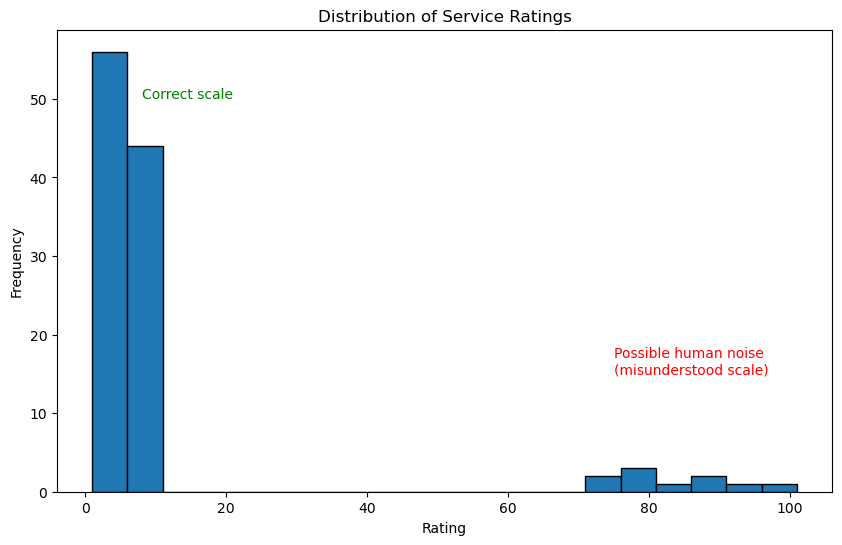

In [146]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Generating synthetic data for demonstration
np.random.seed(0)
valid_ratings = np.random.randint(1, 11, 100)  # Ratings on a scale of 1 to 10
erroneous_ratings = np.random.randint(70, 101, 10)  # Erroneous ratings out of 100
ratings = pd.Series(np.concatenate([valid_ratings, erroneous_ratings]))

# Plotting the data
plt.figure(figsize=(10, 6))
plt.hist(ratings, bins=range(1, 105, 5), edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Service Ratings')

# Highlighting potential noise
#plt.axvline(x=6, color='green', linestyle='--')
plt.text(8, 50, 'Correct scale', color='green')
#plt.axvline(x=80, color='red', linestyle='--')
plt.text(75, 15, 'Possible human noise\n(misunderstood scale)', color='red')

plt.show()


### Did you find LLMs useful for anything in this exercise? Explain why/why not.

Yes, after my first answers, I ran them through the ChatGPT, and it gave me some more ideas about bias and consequences and also a few examples of human noise to chose from. Also, I made the above exampel with chatGPT ^